<div style="background-color:#173267;text-align:center;font-family:Arial;color:white;">
    <br>
    <img src="Files/logo-uc-01.svg" style="width:20%;margin:10px">
    <p style="font-size:40pt;font-weight:bold;text-align:center">
        AYUDANTÍA 9: Regresión simple/múltiple/polinomial
    </p>
    <p style="font-size:20pt;font-weight:bold;margin:20px;text-align:center">
        Introducción a la Ciencia de Datos
    </p>
    <p style="font-size:12pt;text-align:center">
        Felipe Gutiérrez - figutier@uc.cl
        Nicolas Mendicoa - nmendicoa@uc.cl
        <br>11 de Octubre de 2022
    </p>
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:12pt;">        
        Basado en notebook de:
        Vicente Agüero - vicenteaguero@uc.cl
        <br>
    </p>
    <br><br>
</div>

In [251]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Motivación
Por qué queremos hacer regresión?
Queremos ajustar/aproximar la relación entre una variable dependiente/respuesta ($y$), y una o más variables independientes/explicativas/regresoras ($x_i$). 


# Regresión lineal simple
$$y= \beta_0+\beta_1 x + \varepsilon$$
Donde 
* $y$ es la variable respuesta/dependiente (la que queremos predecir)
* $x$ es el regresor/variable independiente (variable que intenta predecir $y$)
* $\varepsilon$ es un "ruido aleatorio" con media 0
* $\beta_0, \beta_1$ son los parámetros del modelo

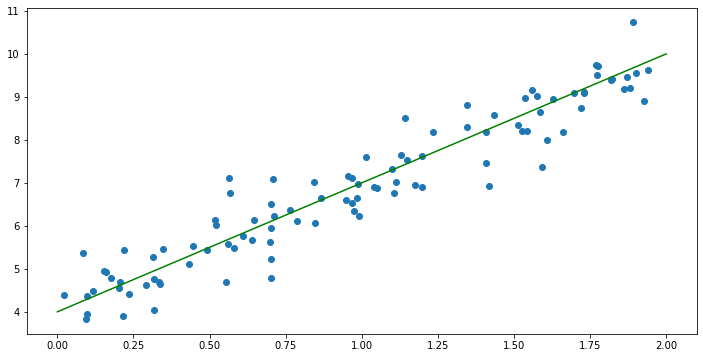

In [46]:
np.random.seed(2200)
n = 100
x = 2*np.random.rand(n) 
beta_0 = 4
beta_1 = 3
epsilon = np.random.randn(n)/2 # ruido blanco

# regresion
y = beta_0 + beta_1 * x + epsilon
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(x, y)

recta_x = np.linspace(0, 2, 1000)
recta_y = beta_0 + beta_1 * np.linspace(0, 2, 1000)
ax.plot(recta_x, recta_y, c='green')
plt.show()

In [52]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x2 = x.reshape(-1,1)
lr.fit(x2,y)

LinearRegression()

Nos puede interesar qué tan bien estamos ajustando la recta. Una medida útil es el $R^2$. En sklearn, usamos lr.score(x,y).

In [55]:
# R2
lr.score(x2,y)

0.9056163245512955

El $R^2$ indica qué tan bien estima la varianza nuestro modelo.
Un $R^2$ cercano a 1 es ideal. Un valor cercano al 0 indica que el modelo ajusta mal.

In [68]:
lr.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [82]:
# Podemos calcular el intercepto (beta_0)
print(lr.intercept_)

# y los coeficientes
print(lr.coef_)

4.0154542927281405
[2.9732181]


In [66]:
# Tambien podemos querer predecir un y, dado un x
valor_a_predecir = np.array([1])
valor_a_predecir = valor_a_predecir.reshape(-1,1)
lr.predict(valor_a_predecir)

array([6.94336195])

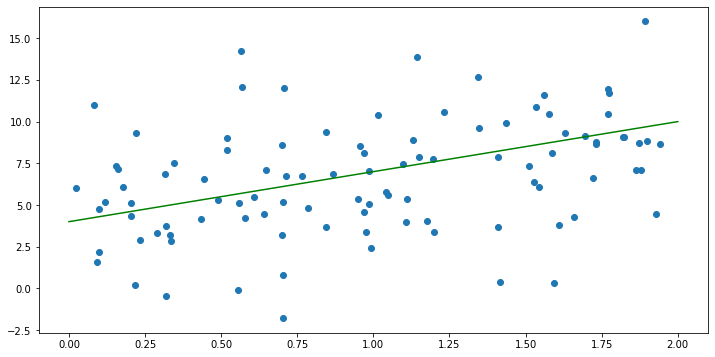

0.13535714795730547

In [78]:
# Varianza grande
np.random.seed(2200)
n = 100
x = 2*np.random.rand(n) 
beta_0 = 4
beta_1 = 3
epsilon = np.random.randn(n)*3 # ruido blanco

# regresion
y = beta_0 + beta_1 * x + epsilon
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(x, y)

recta_x = np.linspace(0, 2, 1000)
recta_y = beta_0 + beta_1 * np.linspace(0, 2, 1000)
ax.plot(recta_x, recta_y, c='green')
plt.show()

lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x2 = x.reshape(-1,1)
lr.fit(x2,y)
lr.score(x2,y)

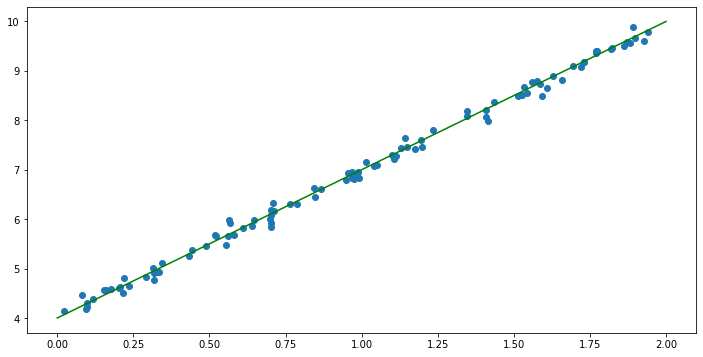

0.9961411333865154

In [80]:
# Predice muy bien, ya que la varianza es muy chica
np.random.seed(2200)
n = 100
x = 2*np.random.rand(n) 
beta_0 = 4
beta_1 = 3
epsilon = np.random.randn(n)/10 # ruido blanco

# regresion
y = beta_0 + beta_1 * x + epsilon
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(x, y)

recta_x = np.linspace(0, 2, 1000)
recta_y = beta_0 + beta_1 * np.linspace(0, 2, 1000)
ax.plot(recta_x, recta_y, c='green')
plt.show()
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x2 = x.reshape(-1,1)
lr.fit(x2,y)

lr.score(x2,y)

# Regresión polinomial
$$y= \beta_0+\beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \varepsilon$$

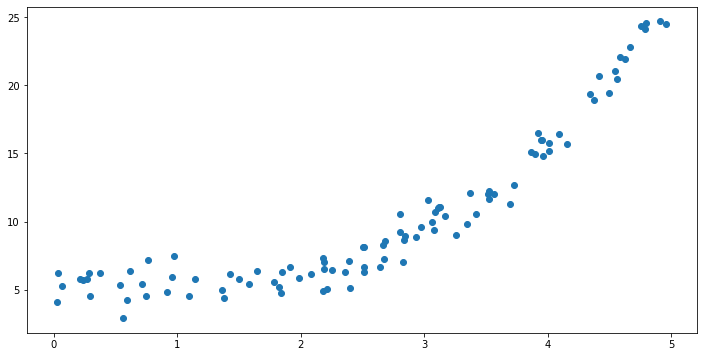

In [375]:
np.random.seed(1234)
n = 100
x = 5*np.random.rand(n,1)
y = (1/6)*x**3 + 5 + np.random.randn(n, 1)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(x, y)
plt.show()

In [376]:
x.shape

(100, 1)

In [377]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly.shape

(100, 4)

In [135]:
lr = LinearRegression()
lr.fit(x_poly, y)

LinearRegression()

In [136]:
lr.score(x_poly, y)

0.9742995304724562

Pregunta: Es la regresión polinomial un tipo de regresión lineal?

# Regresión lineal múltiple

Similar a la regresión lineal simple, pero ahora tendremos múltiples variables independientes $x_i$:
$$y= \beta_0+\beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \varepsilon$$

* $\beta_0, ... ,\beta_n$ son los parámetros del modelo

Cuando hacemos regresion, tenemos una serie de supuestos:
* La variable respuesta es continua, y no algo que debamos clasificar
* Las variables son independientes entre si
* Tenemos homocedasticidad (la varianza de los datos es constante con respecto a $x$). Si no tenemos este supuesto, los datos se pueden ver en forma de "campana"
* No tenemos outliers
* Los errores tienen distribucion normal

### Importante: Si tenemos muchas variables, como elegir las que usaremos para nuestro modelo?

# Ejercicio

In [378]:
car = pd.read_csv('Files/car.csv')
print(car.shape)
car.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [148]:
# Que variable nos interesa como variable respuesta?
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

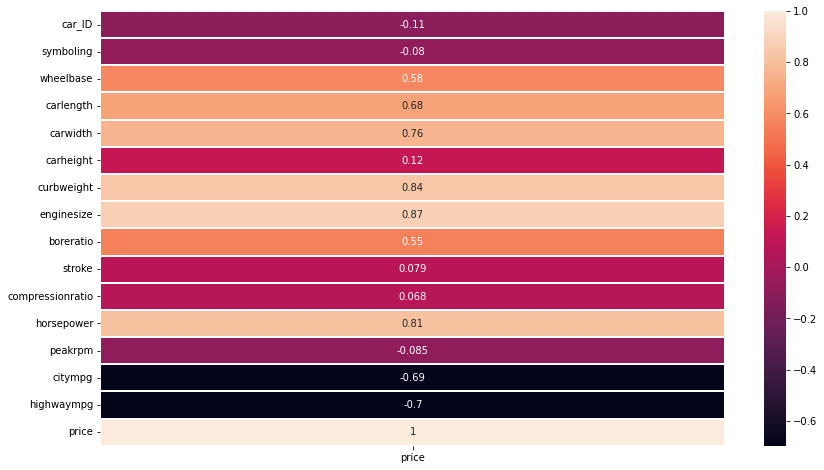

In [155]:
# Primero calculemos la correlacion
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
#sns.heatmap(car.corr(), annot=True, linewidths=0.05, ax=ax)
sns.heatmap(car.corr()[['price']], annot=True, linewidths=0.05, ax=ax)
plt.show()

Que variables seria bueno mantener?

In [ ]:
# Que variables podemos querer usar? Cuales seria bueno descartar?

############################################
## Ejercicio: Elija las variables a usar  ##
############################################

x = car[['a', 'b', ...]]
y = car['variable respuesta']

In [356]:
train_cols = car.corr()[['price']].drop('price').abs()
train_cols = train_cols.loc[train_cols['price'] >= 0.5]
train_cols = train_cols.index.values
train_cols

array(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg'], dtype=object)

In [383]:
# Por que es importante separar entre train y test?
x = car[train_cols]
y = car['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

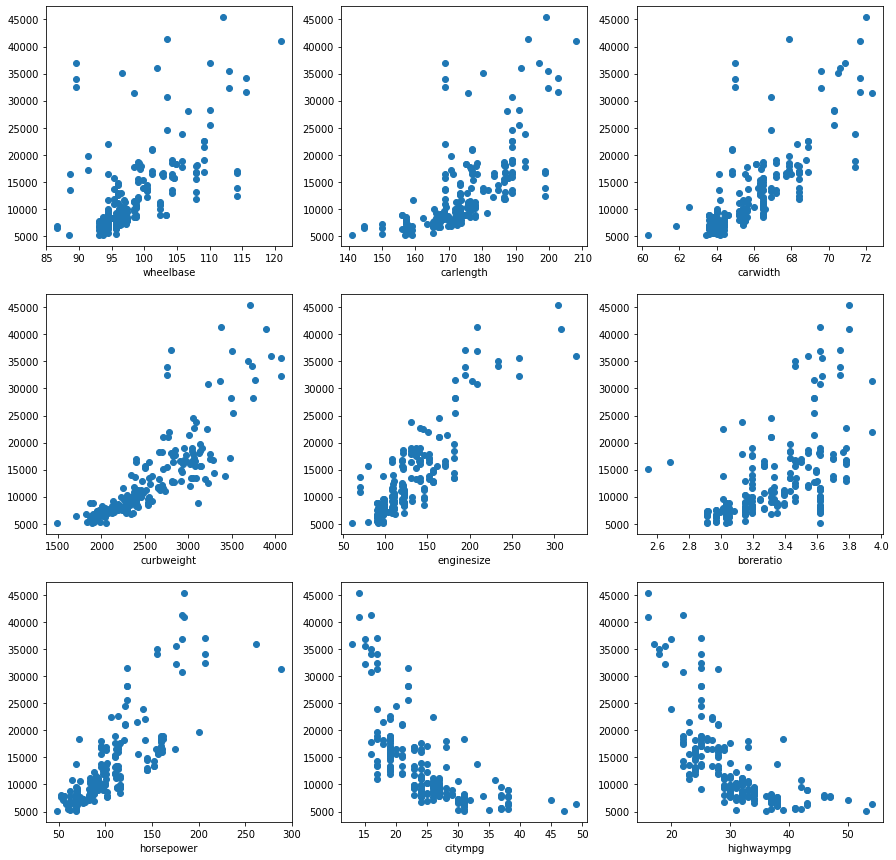

In [384]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax = ax.flatten()
for i, label in zip(range(10), x.columns):
    ax[i].scatter(x[label], y)
    ax[i].set_xlabel(label)
plt.show()

Que podemos decir de la varianza de algunos de estas variables, a medida que aumentamos en el eje x?

In [239]:
print(x_train.shape)
print(x_test.shape)

(143, 9)
(62, 9)


In [385]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [386]:
# R2 de train
lr.score(x_train,y_train)

0.8217279240295181

In [387]:
# R2 de test
lr.score(x_test,y_test)

0.8038820757135215

Queremos que el $R^2$ de test sea similar al de train, ya que de otra manera tenemos overfitting

In [278]:
lr.feature_names_in_

array(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg'], dtype=object)

In [277]:
lr.coef_

array([  62.00157114,  -87.76121935,  733.5825963 ,    3.72920188,
         64.09294564,  182.72167834,   69.64931063, -172.32345861,
        221.27620463])

In [279]:
lr.intercept_

-53940.80350968443

In [388]:
true = y_test.values
pred = lr.predict(x_test)

# Polinomial con $n=2$

In [380]:
x = car[train_cols]
y = car['price']
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns=poly.get_feature_names_out())

In [382]:
x_poly

,1,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,boreratio^2,boreratio horsepower,boreratio citympg,boreratio highwaympg,horsepower^2,horsepower citympg,horsepower highwaympg,citympg^2,citympg highwaympg,highwaympg^2
0,1.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,12.0409,385.17,72.87,93.69,12321.0,2331.0,2997.0,441.0,567.0,729.0
1,1.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,12.0409,385.17,72.87,93.69,12321.0,2331.0,2997.0,441.0,567.0,729.0
2,1.0,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,...,7.1824,412.72,50.92,69.68,23716.0,2926.0,4004.0,361.0,494.0,676.0
3,1.0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,...,10.1761,325.38,76.56,95.70,10404.0,2448.0,3060.0,576.0,720.0,900.0
4,1.0,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,...,10.1761,366.85,57.42,70.18,13225.0,2070.0,2530.0,324.0,396.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0,...,14.2884,430.92,86.94,105.84,12996.0,2622.0,3192.0,529.0,644.0,784.0
201,1.0,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0,...,14.2884,604.80,71.82,94.50,25600.0,3040.0,4000.0,361.0,475.0,625.0
202,1.0,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0,...,12.8164,479.72,64.44,82.34,17956.0,2412.0,3082.0,324.0,414.0,529.0
203,1.0,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0,...,9.0601,319.06,78.26,81.27,11236.0,2756.0,2862.0,676.0,702.0,729.0


In [381]:
poly.get_feature_names_out()

array(['1', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'wheelbase^2', 'wheelbase carlength', 'wheelbase carwidth',
       'wheelbase curbweight', 'wheelbase enginesize',
       'wheelbase boreratio', 'wheelbase horsepower', 'wheelbase citympg',
       'wheelbase highwaympg', 'carlength^2', 'carlength carwidth',
       'carlength curbweight', 'carlength enginesize',
       'carlength boreratio', 'carlength horsepower', 'carlength citympg',
       'carlength highwaympg', 'carwidth^2', 'carwidth curbweight',
       'carwidth enginesize', 'carwidth boreratio', 'carwidth horsepower',
       'carwidth citympg', 'carwidth highwaympg', 'curbweight^2',
       'curbweight enginesize', 'curbweight boreratio',
       'curbweight horsepower', 'curbweight citympg',
       'curbweight highwaympg', 'enginesize^2', 'enginesize boreratio',
       'enginesize horsepower', 'enginesize citympg',
       'enginesize high

In [343]:
# fijense en la cantidad de columnas
x_poly.head()

,1,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,boreratio^2,boreratio horsepower,boreratio citympg,boreratio highwaympg,horsepower^2,horsepower citympg,horsepower highwaympg,citympg^2,citympg highwaympg,highwaympg^2
0,1.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,12.0409,385.17,72.87,93.69,12321.0,2331.0,2997.0,441.0,567.0,729.0
1,1.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,12.0409,385.17,72.87,93.69,12321.0,2331.0,2997.0,441.0,567.0,729.0
2,1.0,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,...,7.1824,412.72,50.92,69.68,23716.0,2926.0,4004.0,361.0,494.0,676.0
3,1.0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,...,10.1761,325.38,76.56,95.70,10404.0,2448.0,3060.0,576.0,720.0,900.0
4,1.0,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,...,10.1761,366.85,57.42,70.18,13225.0,2070.0,2530.0,324.0,396.0,484.0


In [344]:
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size=0.3, random_state=0)

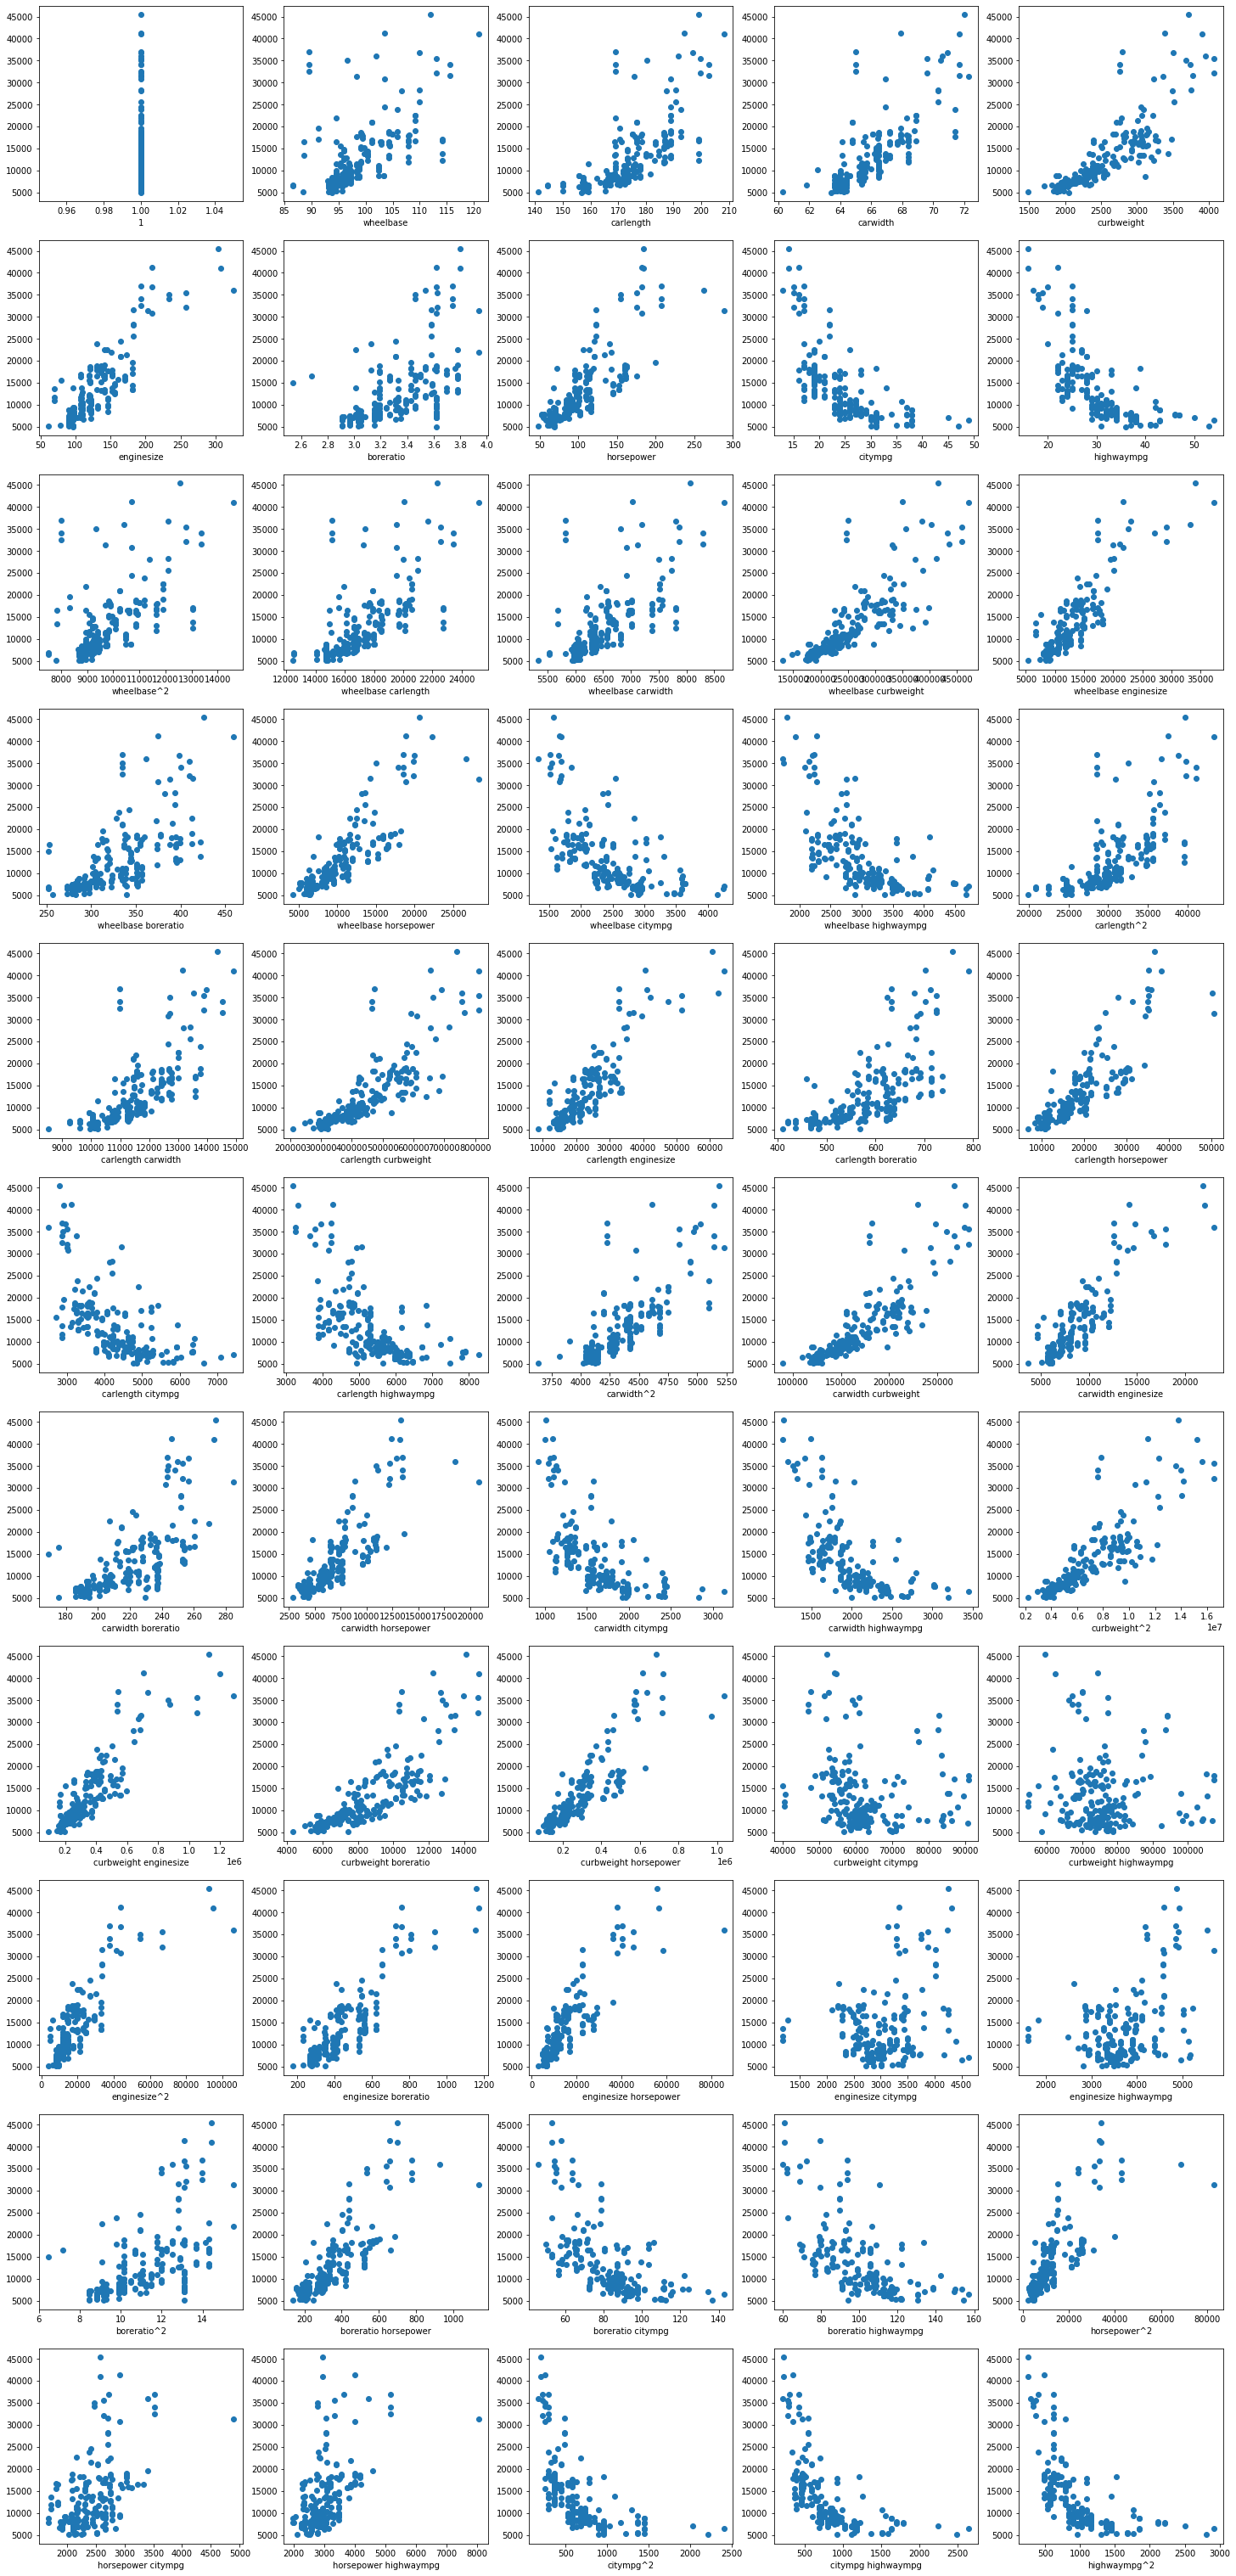

In [347]:
nf, nc, s = 11, 5, 5
fig, ax = plt.subplots(nf, nc, figsize=(nc*s, nf*s))
ax = ax.flatten()
for i, label in zip(range(55), x_poly.columns):
    ax[i].scatter(x_poly[label], y)
    ax[i].set_xlabel(label)
plt.show()

In [371]:
lrp = LinearRegression()
lrp.fit(xp_train, yp_train)

LinearRegression()

In [372]:
# Comparemos los R2
print(f'R2 en train poly: {lrp.score(xp_train,yp_train):.4f}')

print(f'R2 en test poly: {lrp.score(xp_test,yp_test):.4f}\n')

######################################################

print(f'R2 en train lineal: {lr.score(x_train,y_train):.4f}')

print(f'R2 en test lineal: {lr.score(x_test,y_test):.4f}')

R2 en train poly: 0.9569
R2 en test poly: 0.3626

R2 en train lineal: 0.8217
R2 en test lineal: 0.8039


# Métricas

$R^2$ ajustado:
$$\overline{R}^2 = 1 - (1-R^2) \frac{n-1}{n-p}$$
Donde $p$ es el número de variables explicativas. ¿Por qué es necesario usar esta métrica para regresión múltiple?

In [272]:
def regression_results(y_true, y_pred, p):
    explained_variance=explained_variance_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred) 
    mse=mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)

    n = y_true.shape[0]
    adjr2 = 1-(1-r2) * (n-1)/(n-p)

    print('Explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('adjr2: ', round(adjr2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

$$\text{MAE} = \frac{\sum_{i=1}^n |\hat{y_i} - y_i|}{n}$$

$$\text{MSE} = \frac{\sum_{i=1}^n (\hat{y_i} - y_i)^2}{n}$$

$$\text{RMSE} = \sqrt{\text{MSE}}$$

In [389]:
# Lineal
true = y_test.values
pred = lr.predict(x_test)
p = x_test.shape[1]
regression_results(true, pred, p=p)

Explained_variance:  0.8041
r2:  0.8039
adjr2:  0.7743
MAE:  2550.4338
MSE:  12951112.0258
RMSE:  3598.7653


In [390]:
# Lineal
truep = yp_test.values
predp = lrp.predict(xp_test)
p = xp_test.shape[1]
regression_results(truep, predp, p=p)

Explained_variance:  0.3637
r2:  0.3626
adjr2:  -4.5542
MAE:  3023.5509
MSE:  42089741.7438
RMSE:  6487.6607


# Overfitting
Queremos que nuestro modelo sea generalizable, es decir, que se adapte bien a nuevos datos. Esto tambien sera relevante cuando veamos machine learning (ML).

## Preguntas: 
¿Es un $\text{MSE} = 0$ bueno?¿Qué sucede si queremos predecir nuevos datos?
¿Es un $R^2 = 1$ bueno?

<div style="background-color:#173267;text-align:center;font-family:Arial;color:white;">
    <br>
    <img src="Files/Overfitting.png" style="width:80%;margin:12px">
    Fuente imagen: https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76
</div>

# Ejercicio propuesto 1
Modele el dataset anterior como
* Una regresión simple, con la variable con mayor correlación al precio
* Añadiendo variables categóricas

¿Qué puede decir de los resultados, en comparación a los de la ayudantía?

In [ ]:
# a) Regresion simple con variable con mayor correlacion

# Obtener variable con mayor correlacion

# Dividir en train y test

# Hacer el fit

# Hacer las prediciones

# Comparar Metricas con resultado anterior

In [ ]:
# b) Añadiendo variables categóricas

# Ver que variables categoricas incluir

# Modificar la dataframe para variables categoricas

# Dividir en train y test

# Hacer el fit

# Hacer las prediciones

# Comparar Metricas con resultado anterior

# Ejercicio propuesto 2: Outliers
Comente sobre como afecta a las métricas $R^2$, MSE, MAE la adición de 1 outlier, 2 outliers, 3, etc. 

In [ ]:
# Hacer funcion que añada n outliers:
def add_outlier(x, n):
    

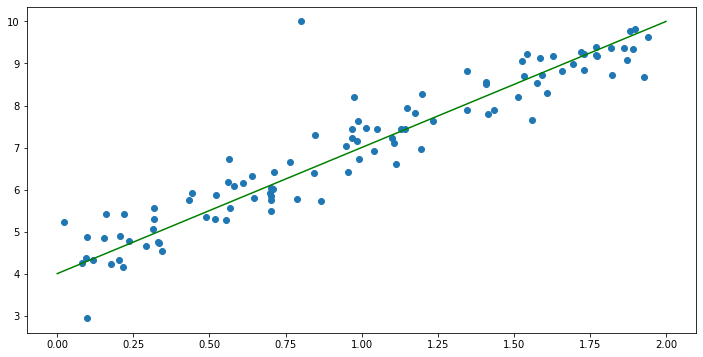

R2 sin outlier:  0.901248960212656
R2 con outlier: 0.8832247296999493


In [327]:
# Ejemplo para 1 outlier
np.random.seed(2200)
n = 100
x = 2*np.random.rand(n) 
beta_0 = 4
beta_1 = 3
epsilon = np.random.randn(n)/2 # ruido blanco
epsilon1 = np.random.randn(n+1)/2 # ruido blanco

x_with_outlier = np.append(x, np.array([0.8]))

# regresion
y = beta_0 + beta_1 * x + epsilon
y_with_outlier = beta_0 + beta_1 * x_with_outlier + epsilon1

# le damos un valor fuera de la tendencia para que sea outlier
y_with_outlier[-1] = 10
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
#ax.scatter(x, y)
ax.scatter(x_with_outlier,y_with_outlier)

recta_x = np.linspace(0, 2, 1000)
recta_y = beta_0 + beta_1 * np.linspace(0, 2, 1000)
ax.plot(recta_x, recta_y, c='green')
plt.show()

lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x_with_outlier2 = x_with_outlier.reshape(-1,1)
x = x.reshape(-1,1)
lr.fit(x_with_outlier2,y_with_outlier)

print("R2 sin outlier: ", lr.score(x,y))
print("R2 con outlier:",lr.score(x_with_outlier2,y_with_outlier))

In [328]:
lr.coef_

array([2.81120431])

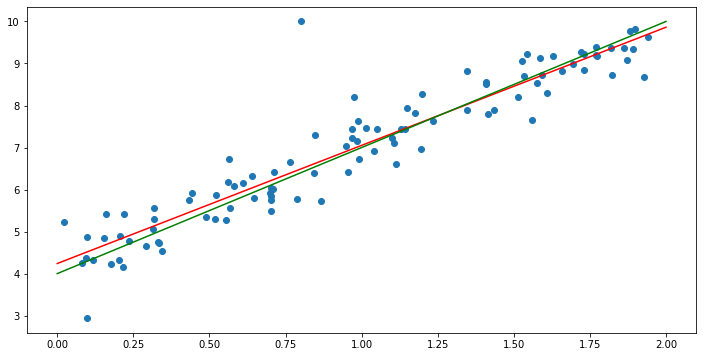

In [329]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(x_with_outlier,y_with_outlier)
recta_x_with_outlier = np.linspace(0, 2, 1000)
recta_y_with_outlier = lr.intercept_ + lr.coef_ * np.linspace(0, 2, 1000)
ax.plot(recta_x_with_outlier, recta_y_with_outlier, c='red')
ax.plot(recta_x, recta_y, c='green')

In [330]:
##################################################
## Codigo para calcular las otras metricas aqui ##
##################################################

# Ejercicio propuesto 3: StandardScaler/Normalizer 
Use StandardScaler o Normalizer para la regresión en el dataset "car.csv". Compare los resultados obtenidos (métricas) normalizados vs no normalizados. Ademas, compare los coeficientes. ¿Es la interpretación de los coeficientes la misma?

In [ ]:
#################
## Codigo aqui ##
#################